# [실습] Python을 활용한 AI 모델링 - 딥러닝 파트
+ 이번시간에는 Python을 활용한 AI 모델링에서 딥러닝에 대해 실습해 보겠습니다.
+ 여기서는 딥러닝 모델 DNN, CNN, RNN 에 대해 코딩하여 모델 구축해 보겠습니다.
+ 한가지 당부 드리고 싶은 말은 "백문이불여일타" 입니다. 
+ 이론보다 실습이 더 많은 시간과 노력이 투자 되어야 합니다.

## 학습목차
1. 실습을 위한 KT AIDU 환경변수 설정
2. 딥러닝 모델(DNN, CNN, RNN) 프로세스
 - 데이터 가져오기
 - 데이터 전처리
 - Train, Test 데이터셋 분할
 - 데이터 정규화
 - 딥러닝 모델 : DNN, CNN, RNN

# 
# 1. 실습을 위한 KT AIDU 환경변수 설정

In [2]:
# 코드실행시 경고 메시지 무시

import warnings
warnings.filterwarnings(action='ignore') 

##### AIDU 라이브러리 임포트

In [ ]:
# from aicentro.session import Session
# from aicentro.framework.keras import Keras as AiduFrm

# aidu_session = Session(verify=False)
# aidu_framework = AiduFrm(session=aidu_session)

##### AIDU 디렉토리 환경변수

- data 경로:         aidu_framework.config.data_dir

In [ ]:
# aidu_framework.config.data_dir 내용 확인
# aidu_framework.config.data_dir

# 
# 2. 딥러닝 모델(DNN, CNN, RNN) 프로세스
① 라이브러리 임포트(import)  
② 데이터 가져오기(Loading the data)  
③ 탐색적 데이터 분석(Exploratory Data Analysis)  
④ 데이터 전처리(Data PreProcessing) : 데이터타입 변환, Null 데이터 처리, 누락데이터 처리, 
더미특성 생성, 특성 추출 (feature engineering) 등  
⑤ Train, Test  데이터셋 분할  
⑥ 데이터 정규화(Normalizing the Data)  
⑦ 모델 개발(Creating the Model)  
⑧ 모델 성능 평가

## ① 라이브러리 임포트

##### 필요 라이브러리 임포트

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## ② 데이터 로드

In [4]:
#고객등급(cust_class), 성별(sex_type), 나이(age), 사용서비스수(efct_svc_count), 서비스중지여부 (dt_stop_yn), 미납여부(npay_yn)
#3개월 평균 요금(r3m_avg_bill_amt), A서비스 3개월 평균요금(r3m_A_avg_arpu_amt), B서비스 3개월 평균요금(r3m_B_avg_arpu_amt), 해지여부(termination_yn)

# df = pd.read_csv(aidu_framework.config.data_dir + '/cust_data.csv')
df = pd.read_csv('./Tabular/cust_data.csv')

## ③ 데이터 분석

In [ ]:
# 12컬럼, 7814 라인
df.info()

In [ ]:
df.tail()

<Axes: xlabel='termination'>

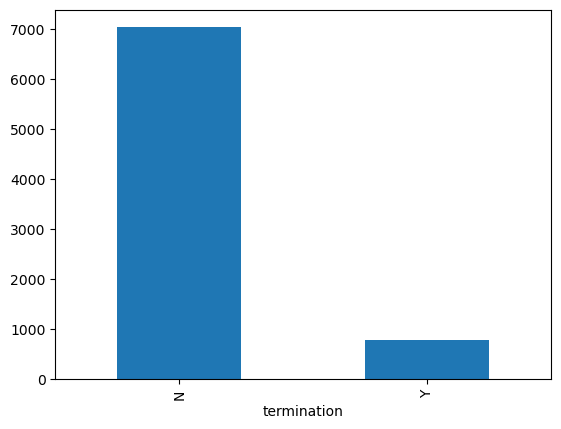

In [5]:
# termination 레이블 불균형 
df['termination'].value_counts().plot(kind='bar')

## ④ 데이터 전처리

+ Object 컬럼에 대해 Pandas get_dummies 함수 활용하여 One-Hot-Encoding

In [6]:
cal_cols = ['class', 'sex', 'stop', 'npay', 'termination', 'bill_rating']

In [7]:
df1 = pd.get_dummies(data=df, columns=cal_cols, drop_first=True)

In [8]:
# 19컬럼, 7814 라인
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7814 entries, 0 to 7813
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  7814 non-null   int64  
 1   service              7814 non-null   int64  
 2   avg_bill             7814 non-null   float64
 3   A_bill               7814 non-null   float64
 4   B_bill               7814 non-null   float64
 5   by_age               7814 non-null   int64  
 6   class_D              7814 non-null   bool   
 7   class_E              7814 non-null   bool   
 8   class_F              7814 non-null   bool   
 9   class_G              7814 non-null   bool   
 10  class_H              7814 non-null   bool   
 11  sex_M                7814 non-null   bool   
 12  stop_Y               7814 non-null   bool   
 13  npay_Y               7814 non-null   bool   
 14  termination_Y        7814 non-null   bool   
 15  bill_rating_low      7814 non-null   b

## ⑤ Train, Test  데이터셋 분할

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df1.drop('termination_Y', axis=1).values
y = df1['termination_Y'].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    stratify=y,
                                                    random_state=42)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

## ⑥ 데이터 정규화/스케일링(Normalizing/Scaling)

In [ ]:
# 숫자 분포 이루어진 컬럼 확인
df1.tail()

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
# 데이터를 0,1 로 스케일링
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train[:2]

+ 모델 입력갯수, 출력갯수 확인

In [ ]:
X_train.shape

In [ ]:
y_train.shape

## ⑦ 모델 개발

###  
## 1) DNN

#### 
#### A. 이진 분류용 DNN layer
+ 18개 input layer
+ unit 4개 hidden layer
+ unit 3개 hidden layer 
+ 1개 output layser : 이진분류

![hidden Layer](https://github.com/gzone2000/TEMP_TEST/raw/master/hidden_layer1.PNG)
+ [출처] https://subscription.packtpub.com/book/data/9781788995207/1/ch01lvl1sec03/deep-learning-intuition

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [15]:
# 18개 input layer
# unit 4개 hidden layer
# unit 3개 hidden layer 
# 1개 output layser : 이진분류

model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(18,)))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#### 모델 확인

In [ ]:
model.summary()

#### 모델 컴파일 – 이진 분류 모델

In [16]:
# 1. `optimizer='adam'`:
#    - `optimizer`는 모델의 가중치를 업데이트하는 방법을 정의하는 알고리즘을 지정합니다.
#    - `adam`은 적응형 모멘트 추정(Adaptive Moment Estimation) 알고리즘을 사용하는 최적화 알고리즘입니다.
#    - Adam은 학습 속도(learning rate)를 자동으로 조정하여 빠르고 효율적인 학습을 가능하게 합니다. 주로 다음과 같은 이유로 널리 사용됩니다:
#      - 적응형 학습률로 인해 초기 학습률 설정에 덜 민감합니다.
#      - 모멘텀을 포함하여 학습이 더욱 안정적이고 빠르게 수렴됩니다.
#      - 이진 분류, 회귀, 다중 분류 등 다양한 문제에 적합합니다.
# 
# 2. `loss='binary_crossentropy'`:
#    - `loss`는 신경망의 성능을 측정하는 데 사용되는 손실 함수입니다. 모델이 얼마나 잘 예측하고 있는지를 평가하고, 이를 통해 가중치를 조정합니다.
#    - `binary_crossentropy`는 이진 분류 문제에 사용되는 손실 함수입니다. 두 클래스 간의 확률 분포를 비교하여 손실을 계산합니다.
#    - 이 함수는 출력층의 활성화 함수가 `sigmoid`일 때 자주 사용됩니다. 이는 모델이 각 샘플에 대해 특정 클래스에 속할 확률을 예측할 때 사용됩니다.
# 
# 3. `metrics=['accuracy']`:
#    - `metrics`는 모델 성능을 평가하기 위한 지표를 지정합니다.
#    - `'accuracy'`는 분류 문제에서 자주 사용되는 지표로, 정확도를 측정합니다. 즉, 모델의 예측이 실제 레이블과 얼마나 일치하는지를 나타냅니다.
#    - 학습 및 평가 단계에서 이 지표를 사용하여 모델 성능을 모니터링합니다.

# 이 컴파일 단계에서는 adam 최적화 알고리즘을 사용하여 모델의 가중치를 업데이트하며, 손실 함수로 binary_crossentropy를 사용하여 이진 분류 문제의 성능을 평가합니다. accuracy를 성능 지표로 설정하여 모델의 정확성을 모니터링합니다.
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 

+ Dropout : 과적합 방지

![dropout](https://github.com/gzone2000/TEMP_TEST/raw/master/dropout.PNG)
+ [출처] https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5

In [17]:
# Dropout의 기본 개념은 훈련 단계에서 무작위로 뉴런을 "꺼"서 신경망의 일부 뉴런을 비활성화하는 것입니다. 이를 통해 모델이 특정 뉴런이나 경로에 과도하게 의존하지 않도록 합니다.
# Dropout(0.3)과 같이 비활성화할 뉴런의 비율을 지정합니다. 이 경우 30%의 뉴런을 무작위로 비활성화합니다.
# Dropout을 적용하면 마치 여러 다른 모델을 앙상블로 학습하는 것과 같은 효과가 있습니다.
# 각 학습 단계에서 다른 서브 네트워크가 생성되고, 모든 서브 네트워크의 가중치를 평균하여 하나의 강력한 모델을 만드는 결과를 가져옵니다.

model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(18,)))
model.add(Dropout(0.3))
model.add(Dense(3, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

#### 모델 컴파일 – 이진 분류 모델

In [18]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 

#### 모델 훈련(학습) 하기

In [19]:
history = model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          epochs=20, 
          batch_size=16)

Epoch 1/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step - accuracy: 0.8962 - loss: 0.4435 - val_accuracy: 0.8994 - val_loss: 0.3022
Epoch 2/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - accuracy: 0.8997 - loss: 0.3514 - val_accuracy: 0.8994 - val_loss: 0.2872
Epoch 3/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.8994 - loss: 0.3214 - val_accuracy: 0.8994 - val_loss: 0.2786
Epoch 4/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.9015 - loss: 0.3079 - val_accuracy: 0.8994 - val_loss: 0.2715
Epoch 5/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.8947 - loss: 0.3091 - val_accuracy: 0.8994 - val_loss: 0.2621
Epoch 6/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.9008 - loss: 0.2854 - val_accuracy: 0.8994 - val_loss: 0.2534
Epoch 7/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.9042 - loss: 0.2721 - val_accuracy: 0.8994 - val_loss: 0.2424
Epoch 8/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.9012 - loss: 0.2599 - 

#### 
#### B. 다중 분류용 DNN layer
+ 18개 input layer
+ unit 5개 hidden layer
+ dropout
+ unit 4개 hidden layer 
+ dropout
+ 2개 output layser : 이진분류

![다중분류](https://github.com/gzone2000/TEMP_TEST/raw/master/hidden_layer2.PNG)
+ [출처] https://www.educba.com/dnn-neural-network/

In [20]:
# 18개 input layer
# unit 5개 hidden layer
# dropout
# unit 4개 hidden layer 
# dropout
# 2개 output layser : 다중분류
# softmax는 다중 클래스 분류 문제(Multi-class Classification)에서 주로 사용됩니다. 예를 들어, 이미지가 여러 가지 사물 중 하나로 분류되어야 할 때 사용됩니다.
model = Sequential()
model.add(Dense(5, activation='relu', input_shape=(18,)))
model.add(Dropout(0.3))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.summary()

#### 모델 컴파일 – 다중 분류 모델

In [21]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) 

#### 모델 훈련(학습) 하기

In [22]:
history = model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          epochs=20, 
          batch_size=16)

Epoch 1/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step - accuracy: 0.8995 - loss: 0.4973 - val_accuracy: 0.8994 - val_loss: 0.3376
Epoch 2/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.8968 - loss: 0.3711 - val_accuracy: 0.8994 - val_loss: 0.2935
Epoch 3/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.9041 - loss: 0.3249 - val_accuracy: 0.8994 - val_loss: 0.2754
Epoch 4/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.8999 - loss: 0.3027 - val_accuracy: 0.8994 - val_loss: 0.2644
Epoch 5/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.9031 - loss: 0.2865 - val_accuracy: 0.8994 - val_loss: 0.2529
Epoch 6/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.8950 - loss: 0.2804 - val_accuracy: 0.8994 - val_loss: 0.2448
Epoch 7/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.9055 - loss: 0.2566 - val_accuracy: 0.8994 - val_loss: 0.2331
Epoch 8/20
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.8957 - loss: 0.2648 - 

## ⑧ 모델 성능 평가
+ 성능 시각화

In [23]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.head()

<Axes: >

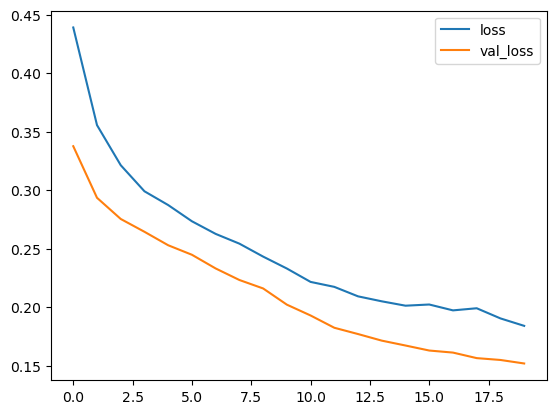

In [24]:
losses[['loss','val_loss']].plot()

<Axes: >

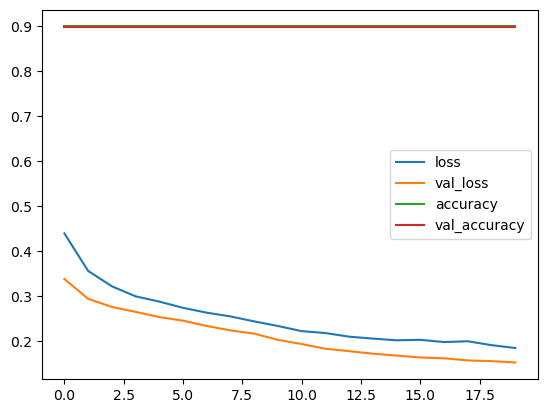

In [25]:
losses[['loss','val_loss', 'accuracy','val_accuracy']].plot()

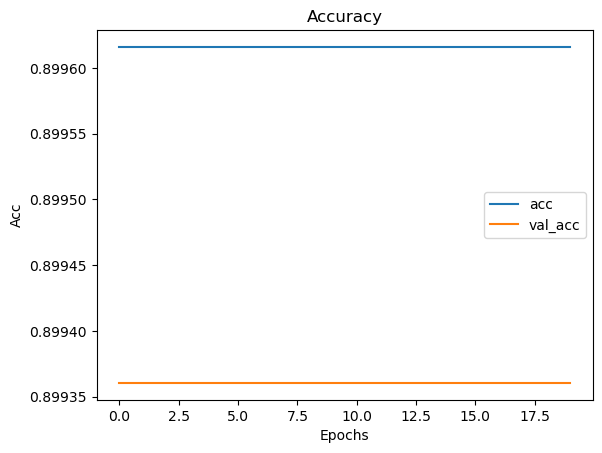

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'])
plt.show()

###  
## 2) CNN

![CNN](https://miro.medium.com/max/2000/1*vkQ0hXDaQv57sALXAJquxA.jpeg)
+ [출처] https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53


+ CNN은 이미지 처리에 높은 성능을 보여주고 있어 DNN에서 다뤄던 Tabular 형태의 데이터를 가지고 테스트 진행하기 어려워
+ 따로 이미지 준비하여 CNN 실습을 진행하겠습니다.

#### KT AIDU 사이트에 업로드된 이미지 파일 가져오기

In [27]:
from glob import glob
import tensorflow as tf

In [ ]:
# KT AIDU 사이트에 업로드한 dataset-clean,dirty.zip 파일 확인
# glob(aidu_framework.config.data_dir + '/dataset-clean,dirty.zip')

In [ ]:
# dataset-clean,dirty.zip 파일을 현재 디렉토리로 복사 
# !mkdir IMAGE
# !cp /aihub/data/dataset-clean,dirty.zip ./IMAGE

In [ ]:
# dataset-small-clean,dirty.zip 압축풀기 
# !cd IMAGE ; unzip dataset-clean,dirty.zip

In [ ]:
# dataset-small-clean,dirty/0.clean 폴더 안의 이지미 갯수
!ls -l ./IMAGE/dataset-clean,dirty/clean | grep jpg | wc -l

In [ ]:
# dataset-small-clean,dirty/1.drity 폴더 안의 이지미 갯수
!ls -l ./IMAGE/dataset-clean,dirty/dirty | grep jpg | wc -l

#### 이미지 파일 하나 읽어 이미지 보기

In [28]:
clean_img_path = './IMAGE/dataset-clean,dirty/clean/plastic1.jpg'

In [29]:
gfile = tf.io.read_file(clean_img_path)
image = tf.io.decode_image(gfile, dtype=tf.float32)

In [ ]:
image.shape

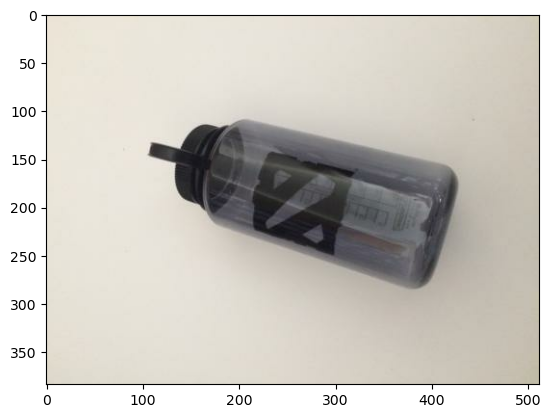

In [30]:
plt.imshow(image)
plt.show()

In [31]:
dirty_img_path = './IMAGE/dataset-clean,dirty/dirty/dirty_plastic1.jpg'

In [32]:
gfile = tf.io.read_file(dirty_img_path)
image = tf.io.decode_image(gfile, dtype=tf.float32)

In [ ]:
image.shape

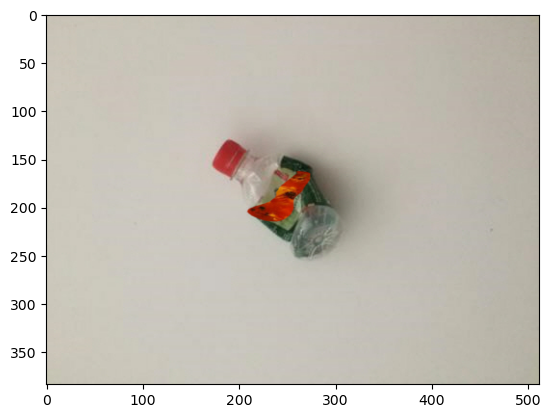

In [33]:
plt.imshow(image)
plt.show()

#### Data Preprocess
+ tensorflow ImageDataGenerator 함수 활용하여 이미지 데이터 스케일 및 트레인 데이터/ 테스트 데이트 나누기
+ flow_from_directory 함수 활용하여 나누어진 트레인 데이터와 테스트 데이터에 대해 배치 사이즈 나누고 , 셔플하고 labeling 수행

In [34]:
# Hyperparameter Tunning

num_epochs = 50 
batch_size = 4
learning_rate = 0.001

input_shape = (384, 512, 3)  # 사이즈 확인
num_classes = 2    # clean, dirty

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [36]:
# ImageDataGenerator 이용하여 이미지 전처리하기

training_datagen = ImageDataGenerator(
      rescale=1. / 255,
      validation_split=0.2     # train set : 435 * (1 - 0.2) = 348
    )

test_datagen = ImageDataGenerator(
      rescale=1./255,
      validation_split=0.2     # test set : 435 * 0.2 = 87
    )

In [37]:
# 이미지 데이터 읽고 배치 , 셔플하고 labeling 수행

# IMAGE 포더 밑에 .ipynb_checkpoints 폴더 있을경우 폴데 삭제
!rm -rf ./IMAGE/dataset-clean,dirty/.ipynb_checkpoints

training_generator = training_datagen.flow_from_directory(
    './IMAGE/dataset-clean,dirty/',
    batch_size=batch_size, 
    target_size=(384, 512),       # 사이즈 확인
    class_mode = 'categorical',   # binary , categorical
    shuffle = True,
    subset = 'training'           # training, validation. validation_split 사용하므로 subset 지정
    )

test_generator = test_datagen.flow_from_directory(
    './IMAGE/dataset-clean,dirty/',
    batch_size=batch_size, 
    target_size=(384, 512),       # 사이즈 확인
    class_mode = 'categorical',   # binary , categorical
    shuffle = True,
    subset = 'validation'         # training, validation. validation_split 사용하므로 subset 지정
    )

Found 696 images belonging to 2 classes.
Found 174 images belonging to 2 classes.


In [ ]:
# class 이름 및 번호 매핑 확인
print(training_generator.class_indices)

True Value :  [0. 1.]


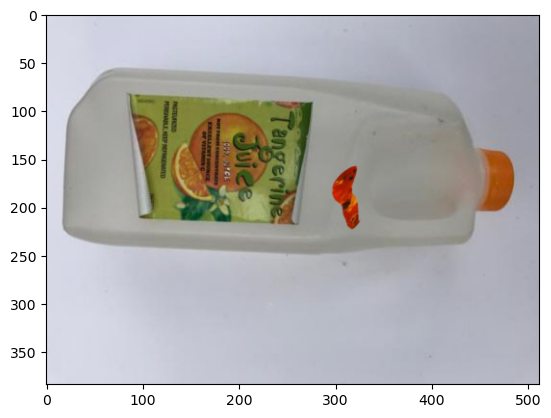

In [38]:
batch_samples = next(iter(training_generator))

print('True Value : ',batch_samples[1][0])
plt.imshow(batch_samples[0][0])   
plt.show()

#### CNN 모델링

In [39]:
#CNN 라이브러리 임포트

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [40]:
# Feature extraction
# filters: 이미지의 feature의 갯수, kernel_size: 이미지의 사이즈(3x3)
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=16, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

# Classification
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.summary()

#### 모델 컴파일 – 이진 분류 모델

In [41]:
#model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), 
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy']) 

#### 모델 훈련(학습) 하기

In [ ]:
len(training_generator)

In [ ]:
len(training_generator) // batch_size

`steps_per_epoch`와 `validation_steps` 의 역할

1. `steps_per_epoch`:
   - 한 에폭(epoch) 동안 학습할 배치의 수를 지정합니다.
   - 전체 훈련 데이터셋을 한 번 모두 사용하는데 필요한 배치의 수를 의미합니다.
   - 계산 방식: 보통 (전체 훈련 샘플 수) / (배치 크기)로 계산합니다.
   - 예를 들어, 1000개의 이미지가 있고 배치 크기가 32라면, steps_per_epoch는 대략 31(1000/32)이 됩니다.
   - 데이터 제너레이터를 사용할 때 특히 중요합니다. 제너레이터가 무한히 데이터를 생성할 수 있기 때문에, 언제 한 에폭이 끝났는지를 모델에게 알려주는 역할을 합니다.

2. `validation_steps`:
   - 각 에폭이 끝날 때 수행할 검증 단계의 수를 지정합니다.
   - 전체 검증 데이터셋을 평가하는데 필요한 배치의 수를 의미합니다.
   - 계산 방식: (전체 검증 샘플 수) / (배치 크기)로 계산합니다.
   - 훈련 과정 중 모델의 성능을 평가하는데 사용됩니다.

이 두 매개변수의 중요성:

1. 데이터 사용량 조절: 실제 데이터셋의 크기와 일치하도록 설정하면, 모든 데이터를 한 번씩 사용하게 됩니다.

2. 메모리 관리: 대규모 데이터셋을 다룰 때 메모리 사용을 효율적으로 관리할 수 있습니다.

3. 학습 속도 조절: 값이 너무 크면 학습이 느려지고, 너무 작으면 데이터를 충분히 활용하지 못할 수 있습니다.

4. 과적합 방지: 적절히 설정하면 모든 데이터를 균형 있게 사용하여 과적합을 줄일 수 있습니다.

코드에서 이 값들은 다음과 같이 설정되어 있습니다:

```python
steps_per_epoch = int(len(training_generator) / batch_size)
validation_steps = int(len(test_generator) / batch_size)
```

이 방식은 데이터 제너레이터의 크기를 배치 크기로 나누어 계산합니다. 하지만 때로는 이 계산이 부정확할 수 있으므로, 실제 데이터셋 크기를 정확히 알고 있다면 그에 맞게 직접 값을 설정하는 것이 좋습니다.

In [48]:
history = model.fit(training_generator, 
          epochs=10 ,
          # steps_per_epoch = 50,
          # validation_steps = 2,
          # steps_per_epoch = len(training_generator) // batch_size, 
          # validation_steps = len(test_generator) // batch_size,
          validation_data=test_generator, 
          verbose=1
)

Epoch 1/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 22s 128ms/step - accuracy: 0.9959 - loss: 0.0765 - val_accuracy: 0.9310 - val_loss: 0.1714
Epoch 2/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 22s 125ms/step - accuracy: 0.9934 - loss: 0.0366 - val_accuracy: 0.9253 - val_loss: 0.2552
Epoch 3/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 22s 125ms/step - accuracy: 1.0000 - loss: 0.0153 - val_accuracy: 0.9368 - val_loss: 0.3003
Epoch 4/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 22s 125ms/step - accuracy: 1.0000 - loss: 0.0095 - val_accuracy: 0.9368 - val_loss: 0.3815
Epoch 5/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 21s 122ms/step - accuracy: 1.0000 - loss: 0.0059 - val_accuracy: 0.9080 - val_loss: 0.4165
Epoch 6/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 21s 122ms/step - accuracy: 1.0000 - loss: 0.0072 - val_accuracy: 0.9080 - val_loss: 0.5042
Epoch 7/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 21s 122ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.8966 - val_loss: 0.5680
Epoch 8/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 21s 122ms/step - accuracy: 1.0000 - loss: 0

#### **성능 시각화 - 성능평가**

In [44]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.head()

<Axes: >

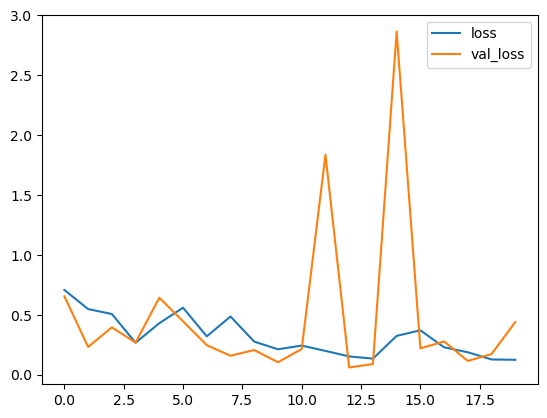

In [45]:
losses[['loss','val_loss']].plot()

<Axes: >

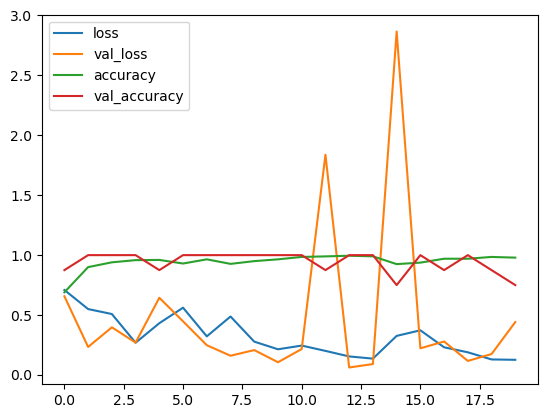

In [46]:
losses[['loss','val_loss', 'accuracy','val_accuracy']].plot()

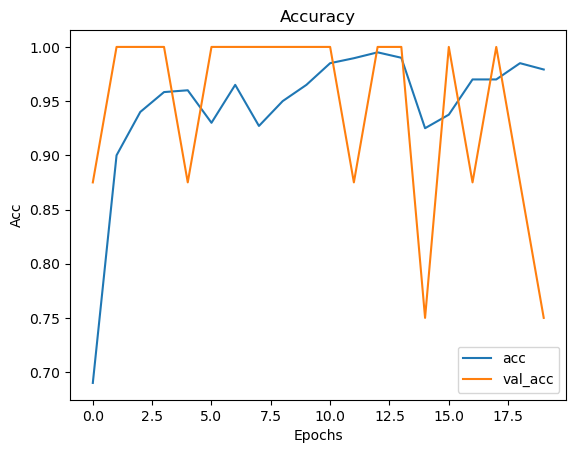

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'])
plt.show()

#### **예측하기**

In [ ]:
# test_generator 샘플 데이터 가져오기
# 배치 사이즈 32 확인

batch_img, batch_label = next(iter(test_generator))
print(batch_img.shape)
print(batch_label.shape)

In [ ]:
# 4개 Test 샘플 이미지 그려보고 예측해 보기

i = 1 
plt.figure(figsize=(16, 30))
for img, label in list(zip(batch_img, batch_label)):
    pred = model.predict(img.reshape(-1,384, 512,3))
    pred_t = np.argmax(pred)
    plt.subplot(8, 4, i)
    plt.title(f'True Value:{np.argmax(label)}, Pred Value: {pred_t}')
    plt.imshow(img)   
    i = i + 1

###  
## 3) RNN 

![RNN](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Recurrent_neural_network_unfold.svg/1200px-Recurrent_neural_network_unfold.svg.png)
+ [출처] https://en.wikipedia.org/wiki/File:Recurrent_neural_network_unfold.svg


+ RNN은 주로 시계열 처리나 자연어 처리에 사용됩니다.
+ 우리 실습에 시계열 데이터나 자연어 관련 데이터가 없어 DNN에서 사용한 Tabular 데이터를 가지고 RNN 실습하도록 하겠습니다.

#### RNN 모델링

In [ ]:
#RNN 라이브러리 임포트

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import LSTM

In [ ]:
X_train.shape, X_test.shape

In [ ]:
X_train = X_train.reshape(-1,18,1)
X_test = X_test.reshape(-1,18,1)

In [ ]:
X_train.shape, X_test.shape

In [ ]:
# define model
model = Sequential()
model.add(LSTM(32, activation='relu', return_sequences=True, input_shape=(18, 1)))
model.add(LSTM(16, activation='relu', return_sequences=True))
model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

#### **모델 컴파일 – 이진 분류 모델**

In [ ]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 

#### **모델 학습**

In [ ]:
history = model.fit(x=X_train, y=y_train, 
          epochs=10 , batch_size=128,
          validation_data=(X_test, y_test), 
          verbose=1
)

#### 성능 시각화 - 성능평가

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.head()

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
losses[['loss','val_loss', 'accuracy','val_accuracy']].plot()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'])
plt.show()

## 배운 내용 정리
1. 딥러닝 모델 프로세스
① 라이브러리 임포트(import)  
② 데이터 가져오기(Loading the data)  
③ 탐색적 데이터 분석(Exploratory Data Analysis)  
④ 데이터 전처리(Data PreProcessing) : 데이터타입 변환, Null 데이터 처리, 누락데이터 처리, 더미특성 생성, 특성 추출 (feature engineering) 등  
⑤ Train, Test  데이터셋 분할  
⑥ 데이터 정규화(Normalizing the Data)  
⑦ 모델 개발(Creating the Model)  
⑧ 모델 성능 평가
2. 딥러닝 모델 DNN, CNN, RNN 모델 구축